# <b>Extreme Data Challenge</b>

##  Today's Mission
- Your objective is to devise the best possible model to predict successful/default loans using Lending Club loan data.

- The training data is 100000 loans labeled either as 1 (successful) or 0 (default). Comes with 33 categorical and numerical features. The testing data is 50000 loans.

- A data dictionary file is included as well. It is a table explaining each what each feature means.

- Your success will be measured on how much money your model makes. You will use your model on the testing dataset by making predictions on it and testing them. Assume that each loan is 1000 dollars and the interest rate is 10 percent. That means for every loan you issue that is successfully repaid, you will earn 100 dollars and for every loan you issue that defaults, you will lose 1000 dollars.
    
        Profit = 100*(Number of True Positives) - 1000*(Number of False Positives) 
        
- Will be on be hand for guidance. However we want you to primarily use your teammates for help. 

- Be sure to use modeling evaluating techniques such as ROC curves, confusion matrix, recall/precision, etc.

- To optimize model, find the right combination of features and the right model with the right parameters. Get creative!

- Remember to use your time wisely, it will go by fast. Communicate amongst yourselves often.
   

### Online resources on Lending Club loan data
Kaggle Page: https://www.kaggle.com/wendykan/lending-club-loan-data. Make sure to check out the kernels section.

Y Hat tutorial (It's in R, but its still useful): http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html

Blog tutorial on the data from Kevin Davenport: http://kldavenport.com/lending-club-data-analysis-revisted-with-python/


In [1]:
#Imports and set pandas options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)

In [2]:
# Load in training data.
# Loan_status column is the target variable. Remember to drop it from df.
df = pd.read_csv("loan_training_data.csv")

In [3]:
#Load in data dictionary
# Loan S
data_dict = pd.read_csv("the_data_dictionary.csv")
data_dict

,dtypes,name,description
0,float64,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit ..."
1,object,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,float64,installment,The monthly payment owed by the borrower if the loan originates.
3,object,grade,LC assigned loan grade
4,object,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
5,object,home_ownership,The home ownership status provided by the borrower during registration or obtained from the cred...
6,float64,annual_inc,The self-reported annual income provided by the borrower during registration.
7,object,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
8,object,loan_status,Current status of the loan
9,object,purpose,A category provided by the borrower for the loan request.


In [4]:
df.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,15000.0,36 months,485.14,B,9 years,MORTGAGE,125000.0,Not Verified,1,debt_consolidation,17.22,0.0,11.0,37651.0,24.0,0.0,87483.0,58300.0,7953.0,53.6,2.0,0.0,2.0,7.0,2.0,8.0,7.0,0.0,1.0,87483.0,8500.0,45764.0,687.0
1,12250.0,60 months,295.37,C,7 years,RENT,35000.0,Source Verified,0,credit_card,19.51,0.0,9.0,12681.0,19.0,0.0,13938.0,19345.0,1742.0,69.1,0.0,0.0,5.0,5.0,7.0,16.0,5.0,0.0,1.0,13938.0,18345.0,14793.0,722.0
2,17000.0,36 months,556.48,B,10+ years,MORTGAGE,67000.0,Source Verified,1,debt_consolidation,21.26,0.0,14.0,27320.0,33.0,0.0,43035.0,43500.0,3074.0,66.2,1.0,0.0,4.0,6.0,6.0,12.0,6.0,0.0,0.0,43035.0,31800.0,27657.0,747.0
3,8250.0,36 months,263.01,B,9 years,OWN,29000.0,Not Verified,1,debt_consolidation,24.34,0.0,14.0,8253.0,22.0,0.0,46863.0,13600.0,3347.0,71.8,0.0,0.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,46863.0,11400.0,40279.0,702.0
4,7125.0,36 months,256.06,D,9 years,RENT,87000.0,Source Verified,0,house,13.92,2.0,12.0,2426.0,19.0,1215.0,22318.0,5400.0,1860.0,47.2,0.0,0.0,5.0,7.0,7.0,8.0,8.0,0.0,2.0,22318.0,4700.0,26334.0,677.0


### Ready, Set, Go!!

In [5]:
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('years', '').replace('year','').replace('+',''))

In [6]:
df.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,15000.0,36 months,485.14,B,9,MORTGAGE,125000.0,Not Verified,1,debt_consolidation,17.22,0.0,11.0,37651.0,24.0,0.0,87483.0,58300.0,7953.0,53.6,2.0,0.0,2.0,7.0,2.0,8.0,7.0,0.0,1.0,87483.0,8500.0,45764.0,687.0
1,12250.0,60 months,295.37,C,7,RENT,35000.0,Source Verified,0,credit_card,19.51,0.0,9.0,12681.0,19.0,0.0,13938.0,19345.0,1742.0,69.1,0.0,0.0,5.0,5.0,7.0,16.0,5.0,0.0,1.0,13938.0,18345.0,14793.0,722.0
2,17000.0,36 months,556.48,B,10,MORTGAGE,67000.0,Source Verified,1,debt_consolidation,21.26,0.0,14.0,27320.0,33.0,0.0,43035.0,43500.0,3074.0,66.2,1.0,0.0,4.0,6.0,6.0,12.0,6.0,0.0,0.0,43035.0,31800.0,27657.0,747.0
3,8250.0,36 months,263.01,B,9,OWN,29000.0,Not Verified,1,debt_consolidation,24.34,0.0,14.0,8253.0,22.0,0.0,46863.0,13600.0,3347.0,71.8,0.0,0.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,46863.0,11400.0,40279.0,702.0
4,7125.0,36 months,256.06,D,9,RENT,87000.0,Source Verified,0,house,13.92,2.0,12.0,2426.0,19.0,1215.0,22318.0,5400.0,1860.0,47.2,0.0,0.0,5.0,7.0,7.0,8.0,8.0,0.0,2.0,22318.0,4700.0,26334.0,677.0


In [7]:
df['term']=df['term'].apply(lambda x: x.replace('months',''))

In [8]:
df.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average
0,15000.0,36,485.14,B,9,MORTGAGE,125000.0,Not Verified,1,debt_consolidation,17.22,0.0,11.0,37651.0,24.0,0.0,87483.0,58300.0,7953.0,53.6,2.0,0.0,2.0,7.0,2.0,8.0,7.0,0.0,1.0,87483.0,8500.0,45764.0,687.0
1,12250.0,60,295.37,C,7,RENT,35000.0,Source Verified,0,credit_card,19.51,0.0,9.0,12681.0,19.0,0.0,13938.0,19345.0,1742.0,69.1,0.0,0.0,5.0,5.0,7.0,16.0,5.0,0.0,1.0,13938.0,18345.0,14793.0,722.0
2,17000.0,36,556.48,B,10,MORTGAGE,67000.0,Source Verified,1,debt_consolidation,21.26,0.0,14.0,27320.0,33.0,0.0,43035.0,43500.0,3074.0,66.2,1.0,0.0,4.0,6.0,6.0,12.0,6.0,0.0,0.0,43035.0,31800.0,27657.0,747.0
3,8250.0,36,263.01,B,9,OWN,29000.0,Not Verified,1,debt_consolidation,24.34,0.0,14.0,8253.0,22.0,0.0,46863.0,13600.0,3347.0,71.8,0.0,0.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,46863.0,11400.0,40279.0,702.0
4,7125.0,36,256.06,D,9,RENT,87000.0,Source Verified,0,house,13.92,2.0,12.0,2426.0,19.0,1215.0,22318.0,5400.0,1860.0,47.2,0.0,0.0,5.0,7.0,7.0,8.0,8.0,0.0,2.0,22318.0,4700.0,26334.0,677.0


In [9]:
df1=pd.get_dummies(df)

In [10]:
df1.head()

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,term_ 36,term_ 60,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_10,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_< 1,emp_length_n/a,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,15000.0,485.14,125000.0,1,17.22,0.0,11.0,37651.0,24.0,0.0,87483.0,58300.0,7953.0,53.6,2.0,0.0,2.0,7.0,2.0,8.0,7.0,0.0,1.0,87483.0,8500.0,45764.0,687.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,12250.0,295.37,35000.0,0,19.51,0.0,9.0,12681.0,19.0,0.0,13938.0,19345.0,1742.0,69.1,0.0,0.0,5.0,5.0,7.0,16.0,5.0,0.0,1.0,13938.0,18345.0,14793.0,722.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,17000.0,556.48,67000.0,1,21.26,0.0,14.0,27320.0,33.0,0.0,43035.0,43500.0,3074.0,66.2,1.0,0.0,4.0,6.0,6.0,12.0,6.0,0.0,0.0,43035.0,31800.0,27657.0,747.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,8250.0,263.01,29000.0,1,24.34,0.0,14.0,8253.0,22.0,0.0,46863.0,13600.0,3347.0,71.8,0.0,0.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,46863.0,11400.0,40279.0,702.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,7125.0,256.06,87000.0,0,13.92,2.0,12.0,2426.0,19.0,1215.0,22318.0,5400.0,1860.0,47.2,0.0,0.0,5.0,7.0,7.0,8.0,8.0,0.0,2.0,22318.0,4700.0,26334.0,677.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
df1.groupby('loan_status').mean().round()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,term_ 36,term_ 60,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_10,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_< 1,emp_length_n/a,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,15191.0,458.0,67222.0,19.0,0.0,12.0,15369.0,25.0,148.0,116344.0,26643.0,11039.0,69.0,2.0,0.0,4.0,6.0,5.0,9.0,6.0,0.0,2.0,44489.0,17201.0,36044.0,689.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14007.0,438.0,75259.0,17.0,0.0,11.0,16312.0,26.0,261.0,142491.0,30752.0,14062.0,64.0,2.0,0.0,4.0,6.0,5.0,9.0,6.0,0.0,2.0,45543.0,20610.0,36914.0,698.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df1.corr()

,loan_amnt,installment,annual_inc,loan_status,dti,delinq_2yrs,open_acc,revol_bal,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,bc_util,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,num_tl_op_past_12m,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,term_ 36,term_ 60,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1,emp_length_10,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_< 1,emp_length_n/a,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
loan_amnt,1.000000,0.957852,0.351962,-0.057199,0.025183,0.000422,0.189477,0.320956,0.220932,-0.002380,0.325321,0.246345,0.245818,0.041835,0.234247,-0.053404,0.176035,0.136309,0.196488,0.185690,0.139538,-0.017708,-0.020714,0.279695,0.386386,0.190054,0.129119,-0.391942,0.391942,0.011652,-0.097133,-0.016980,0.012360,0.095117,0.083968,0.068272,-0.025529,0.099877,-0.023508,-0.019814,-0.011439,-0.015628,-0.004700,-0.001337,0.003354,0.013952,-0.030239,-0.078526,0.197836,0.000271,-0.002042,-0.034567,-0.181868,-0.343666,0.078321,0.256217,-0.057496,0.011658,0.099246,-0.007340,0.006830,-0.053580,-0.058138,-0.059424,-0.121806,-0.012773,0.013894,-0.073203,-0.022987
installment,0.957852,1.000000,0.349035,-0.030657,0.022228,0.010888,0.180594,0.312096,0.199192,-0.001845,0.292854,0.230181,0.216395,0.067921,0.203111,-0.047021,0.185554,0.150196,0.195216,0.179780,0.153332,-0.012507,-0.008010,0.264790,0.356788,0.175526,0.081104,-0.156010,0.156010,0.009745,-0.069575,-0.024710,0.008333,0.074375,0.074270,0.065414,-0.022445,0.087840,-0.022333,-0.016059,-0.008718,-0.012189,-0.003303,-0.003507,0.002509,0.013020,-0.027168,-0.069728,0.166249,0.002297,-0.001245,-0.031093,-0.151706,-0.308640,0.053587,0.245922,-0.057791,0.010857,0.092872,-0.014948,0.010237,-0.055500,-0.054686,-0.054220,-0.109452,-0.011458,0.028237,-0.070460,-0.017721
annual_inc,0.351962,0.349035,1.000000,0.053525,-0.191394,0.053401,0.141680,0.308211,0.200877,0.002820,0.440537,0.250198,0.355761,-0.013911,0.247659,0.027096,0.083616,0.052787,0.107539,0.128786,0.053940,0.016334,0.049395,0.346310,0.285453,0.276766,0.105968,-0.061063,0.061063,0.097186,-0.016590,-0.034366,-0.032504,-0.003293,-0.002545,0.018257,-0.012391,0.073153,-0.009970,-0.005250,-0.004611,-0.004014,-0.006343,0.000744,-0.003765,0.004092,-0.019199,-0.089900,0.167883,-0.003271,-0.002682,-0.040579,-0.147683,-0.119188,0.061217,0.056700,-0.010309,-0.010600,-0.022137,0.063739,0.011885,0.006563,0.018429,-0.009160,-0.013990,-0.001926,0.025463,-0.004683,-0.003434
loan_status,-0.057199,-0.030657,0.053525,1.000000,-0.114501,-0.015102,-0.028202,0.017591,0.014100,0.001536,0.067373,0.037532,0.074553,-0.074222,0.060053,-0.006039,-0.038552,-0.074158,-0.007712,0.017614,-0.074587,-0.004912,-0.078373,0.009556,0.069286,0.008803,0.121534,0.194477,-0.194477,0.135155,0.120481,-0.027207,-0.098329,-0.134404,-0.099442,-0.059289,-0.000072,0.016191,-0.001266,0.000206,0.005422,0.006049,0.001491,-0.000890,-0.004252,-0.006989,-0.001023,-0.036687,0.055384,-0.001449,0.000260,-0.008054,-0.051833,0.079914,-0.044230,-0.035010,0.007581,0.041871,-0.026441,0.009175,-0.001638,0.011031,-0.002409,-0.014863,-0.019175,-0.002541,-0.034966,-0.000046,0.001458
dti,0.025183,0.022228,-0.191394,-0.114501,1.000000,-0.012303,0.290619,0.123058,0.216056,-0.004204,-0.017157,0.045119,-0.130805,0.178467,-0.053458,-0.055236,0.152936,0.244580,0.089573,0.059871,0.246292,-0.024024,0.112357,0.292692,0.028514,0.336915,-0.070167,-0.070622,0.070622,-0.118218,-0.0

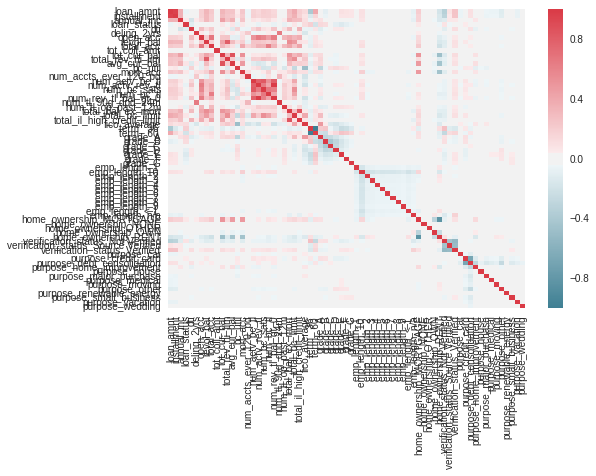

In [13]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)
correlations=df1.corr()
sb.heatmap(correlations, cmap=cmap)

In [14]:
feature_cols=df1.drop('loan_status',axis=1)
target_col=df1.loan_status
X_all=feature_cols
y_all=target_col

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score as recall

from sklearn.metrics import roc_auc_score, roc_curve

from time import time
from sklearn.metrics import f1_score

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics


/home/ubhuru/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [17]:
from sklearn import preprocessing
X_all1 = preprocessing.scale(X_all)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_all1, y_all, train_size=0.8, random_state=1)

In [19]:
clf_A=LogisticRegression(random_state=42)
clf_B=GradientBoostingClassifier(random_state=42)
classifiers=(clf_A, clf_B)

In [20]:
clf_B=clf_B.fit(X_train, y_train)
pred_probs = clf_B.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, pred_probs)
roc_auc_score(y_test, pred_probs)

0.71956492945095585

In [21]:
from sklearn.metrics import confusion_matrix
#Profit calculator
def profit_calculator(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    tp = cm[1,1]
    fp = cm[0,1]
    return 100*tp - 1000*fp

In [22]:
def predictor(model, X_train, X_test, y_train, thres=.909):
    #Initialize Model
    mod = clf_B
    #Train model on training data
    mod.fit(X_train, y_train)
    #Make predictions on the testing set (X_test)
    preds = mod.predict_proba(X_test)
    #preds >= thres returns boolean values
    #np.where replaces True with 1 and False with 0
    threshold_adjusted_preds = np.where(preds>=thres, 1, 0)
    #Return the 2nd column. The 2nd columns is probabiltity of success.
    #Returns an array of 1s and 0s
    return threshold_adjusted_preds[:,1]
thres_preds = predictor(LogisticRegression, X_train, X_test, y_train)
profit_calculator(y_test, thres_preds)

129800

In [ ]:
#models = pd.DataFrame({
#    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#              'Random Forest', 'Naive Bayes', 'Perceptron', 
#              'Stochastic Gradient Decent', 'Linear SVC', 
#              'Decision Tree'],
#    'Score': [acc_svc, acc_knn, acc_log, 
#              acc_random_forest, acc_gaussian, acc_perceptron, 
#              acc_sgd, acc_linear_svc, acc_decision_tree]})
#models.sort_values(by='Score', ascending=False)